<a href="https://colab.research.google.com/github/sti1ia/study/blob/main/Ekzamen1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Подрубаем библиотеки
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
sns.set_palette('crest')

print("Libraries were downloaded successfully!")

Libraries were downloaded successfully!


# **Пункт 1- Загрузить датасет regression_1_2108.csv и провести визуальный и разведочный анализы данных**

In [ ]:
#Загружаем данные в датасет
data = pd.read_csv('regression_1_2108.csv', delimiter=',')
data

,age,sex,profession,income
0,31.0,female,unemployed,46923.0
1,42.0,female,unemployed,46351.0
2,NaN,NaN,unemployed,46667.0
3,26.0,female,worker,92381.0
4,35.0,female,worker,91667.0
...,...,...,...,...
9995,41.0,male,worker,111389.0
9996,39.0,male,worker,111471.0
9997,34.0,male,worker,111724.0
9998,33.0,male,worker,111786.0


**1.1 Определить входные и выходные переменные**

In [ ]:
#Проводим разведопрос
column_names = list(data)
#Запишем входные и выходные параметры
input = column_names[:-1]
output = column_names[-1:]

print('Input parameters are:\t', input)
print('Output parameter is:\t', output)

Input parameters are:	 ['age', 'sex', 'profession']
Output parameter is:	 ['income']


**1.2 Проверить наличие пропущенных значений в данных**


 Missing values are
age 	 482
sex 	 482
profession 	 0
income 	 0




Text(0.5, 1.0, 'Heatmap of missing values')

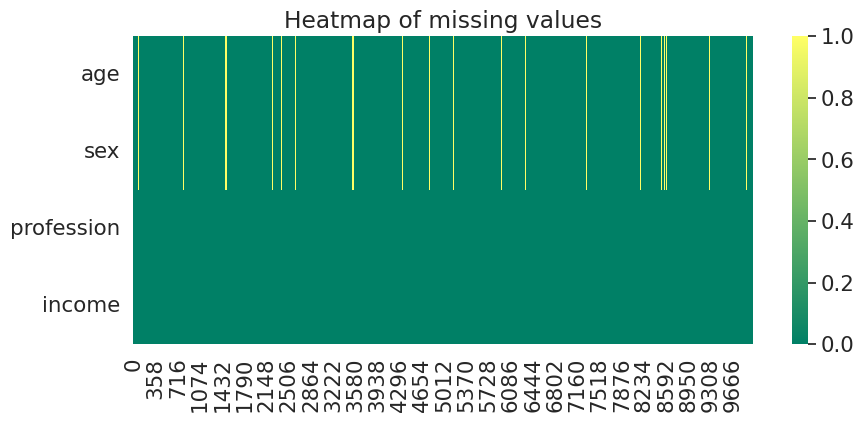

In [ ]:
#Проверим пропущенные данные
print("\n", "Missing values are")
for col in data.columns:
    print(col, '\t', data[col].isna().sum())
del col, column_names
print("\n")

#Красиво нарисуем пропуски
#na_cols=data.columns[data.isna().any()].tolist()
plt.figure(figsize=(10,4))
sns.heatmap(data.isna().T, cmap='summer')
plt.title('Heatmap of missing values')

**1.3 Для количественных признаков построить диаграммы рассеяния и диаграммы Box-and-Whisker, для категориальных признаков – гистограммы частот вариантов.**

Сделать выводы о характере распределений признаков, наличии выбросов.


In [ ]:
#Выделяем категориальные и численные признаки
cat_cols = ['sex', 'profession']
num_cols = ['age']
target = ['income']

print("Heads of dataset were categorized successfully!")

Heads of dataset were categorized successfully!


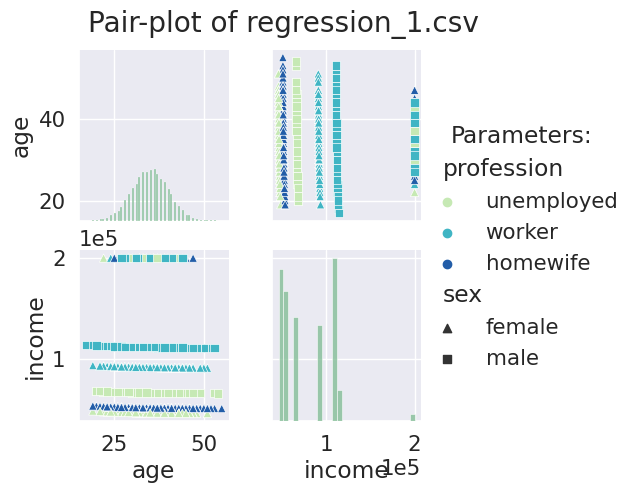

In [ ]:
#Строим диаграмму рессеяния для численных признаков
from matplotlib import markers

g = sns.PairGrid(data)
g.map_diag(sns.histplot, hue=None)
g.map_offdiag(sns.scatterplot, hue=data["profession"], style=data["sex"],
              markers={"female": "^", "male": "s"}, palette='YlGnBu')
g.add_legend(title="Parameters:", adjust_subtitles=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Pair-plot of regression_1.csv')

for ax in g.axes.flatten():
    ax.ticklabel_format(style='sci', scilimits=(0,2), axis='both')
del g, ax

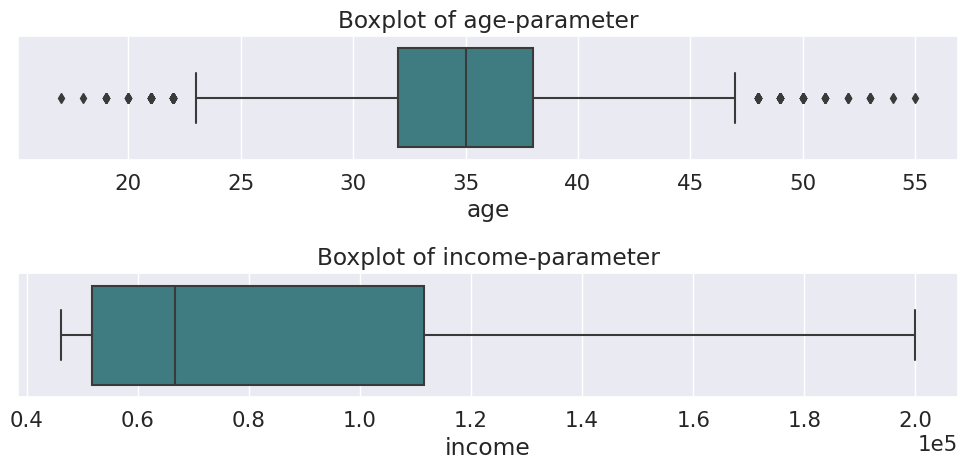

In [ ]:
#Box-and-whisker диаграмма
cat_feats = num_cols + target

fig=plt.figure(figsize=(10,5))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(2,1,i+1)
    sns.boxplot(data=data, x=var_name, palette='crest')
    ax.set_title('Boxplot of {0}-parameter'.format((num_cols+target)[i]))
    ax.ticklabel_format(style='sci', scilimits=(0,2), axis='x')
fig.tight_layout()
plt.show()
del fig, ax, i, var_name

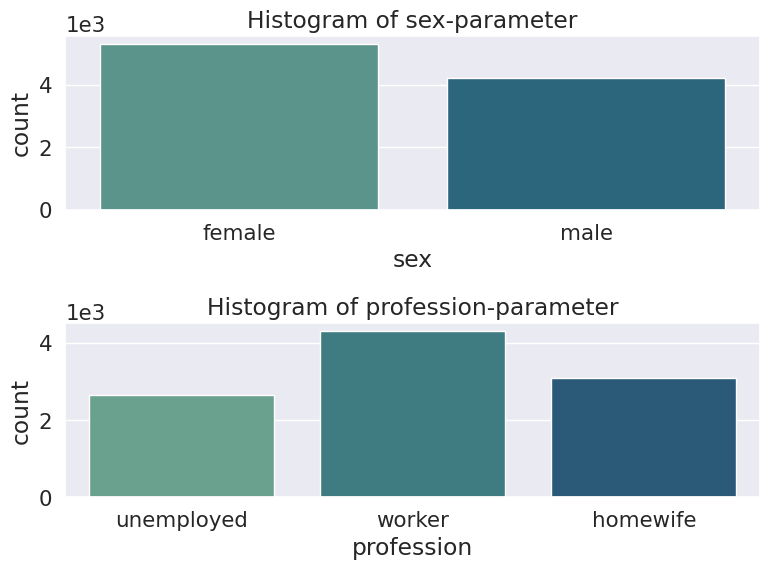

In [ ]:
#Гистограммы частот вариантов
fig=plt.figure(figsize=(8, 6))
for i, var_name in enumerate(cat_cols):
  ax=fig.add_subplot(2,1,1+i)
  sns.countplot(data=data, x=cat_cols[i], axes=ax, palette='crest')
  ax.set_title('Histogram of {0}-parameter'.format((cat_cols)[i]))
  ax.ticklabel_format(style='sci', scilimits=(0,2), axis='y')
fig.tight_layout()  # Improves appearance a bit
plt.show()
del fig, ax, var_name, i

**1.4 Для количественных переменных построить диаграммы рассеяния и рассчитать статистику (среднее значение, размах, число вариантов и др.)**

<ipython-input-10-765b39c69e2f>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='age', binwidth=1, kde=True,


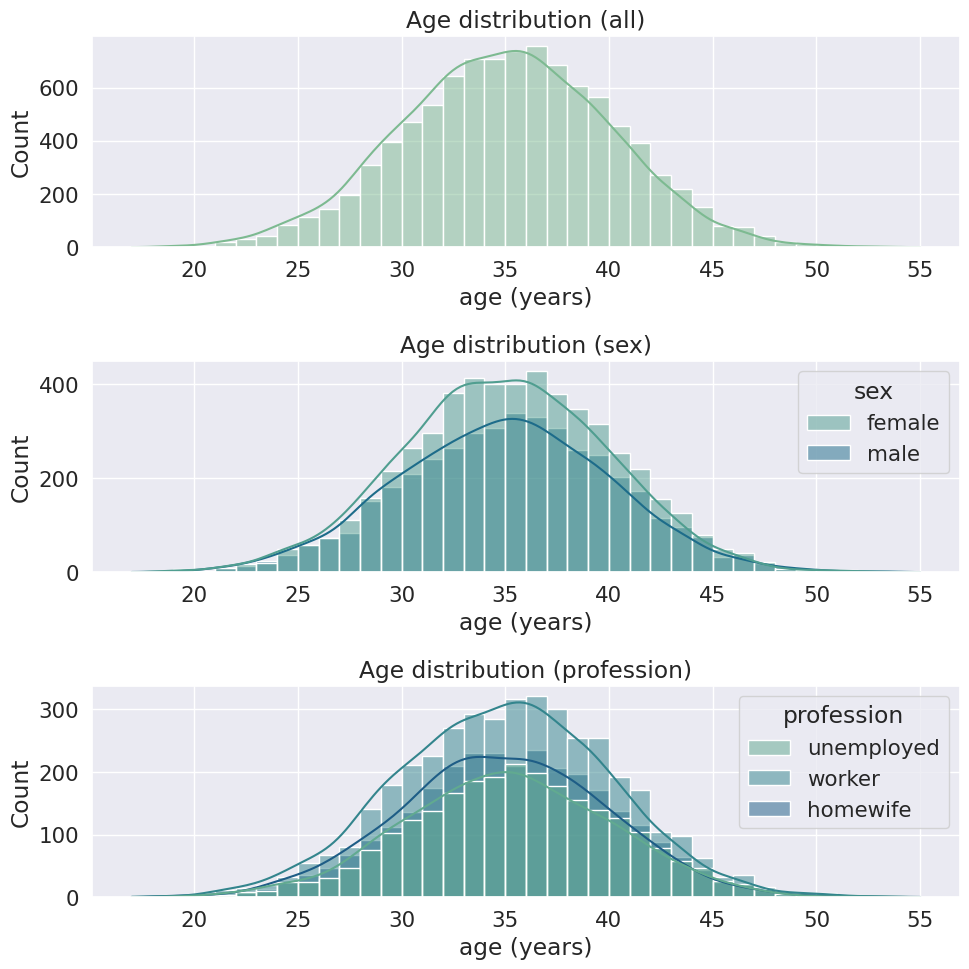

In [ ]:
#Распределение возраста
fig=plt.figure(figsize=(10, 10))

for i, var_name in enumerate([None]+cat_cols):
  ax=fig.add_subplot(3,1,1+i)
  sns.histplot(data=data, x='age', binwidth=1, kde=True,
               palette='crest', hue=([None]+cat_cols)[i])
  plt.xlabel('age (years)')
  ax.set_title('Age distribution ({0})'.format((['all']+cat_cols)[i]))

fig.tight_layout()
plt.show()
del fig, ax, var_name, i

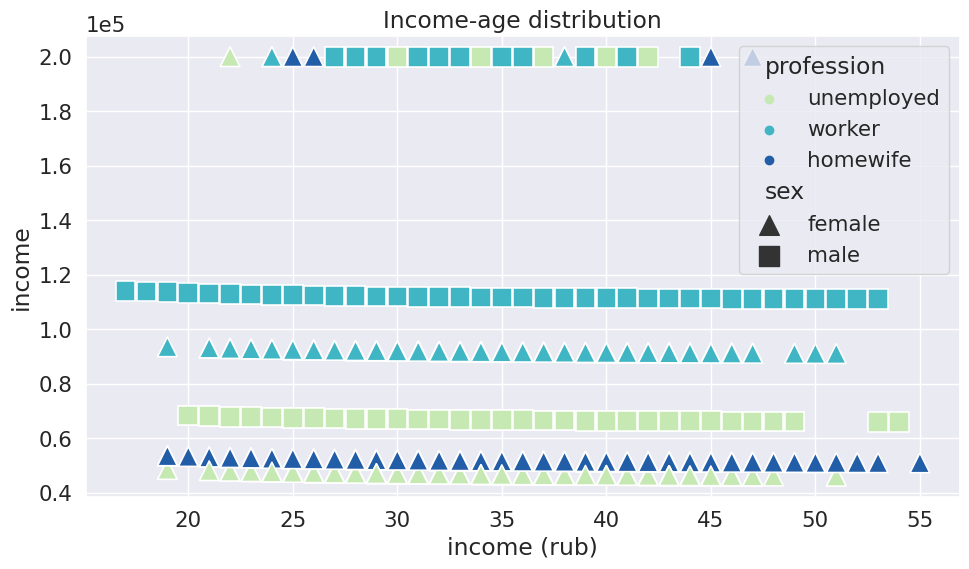

In [ ]:
#Распределение дохода
fig=plt.figure(figsize=(10, 6))
g = sns.scatterplot(data=data, x='age', y='income', hue=data["profession"],
                style=data["sex"], markers={"female": "^", "male": "s"},
                palette='YlGnBu', size="sex", sizes=(200, 200))
g.ticklabel_format(style='sci', scilimits=(0,2), axis='both')
plt.xlabel('income (rub)')
plt.title('Income-age distribution')
fig.tight_layout()
plt.show()
del fig, g

<Figure size 1200x400 with 0 Axes>

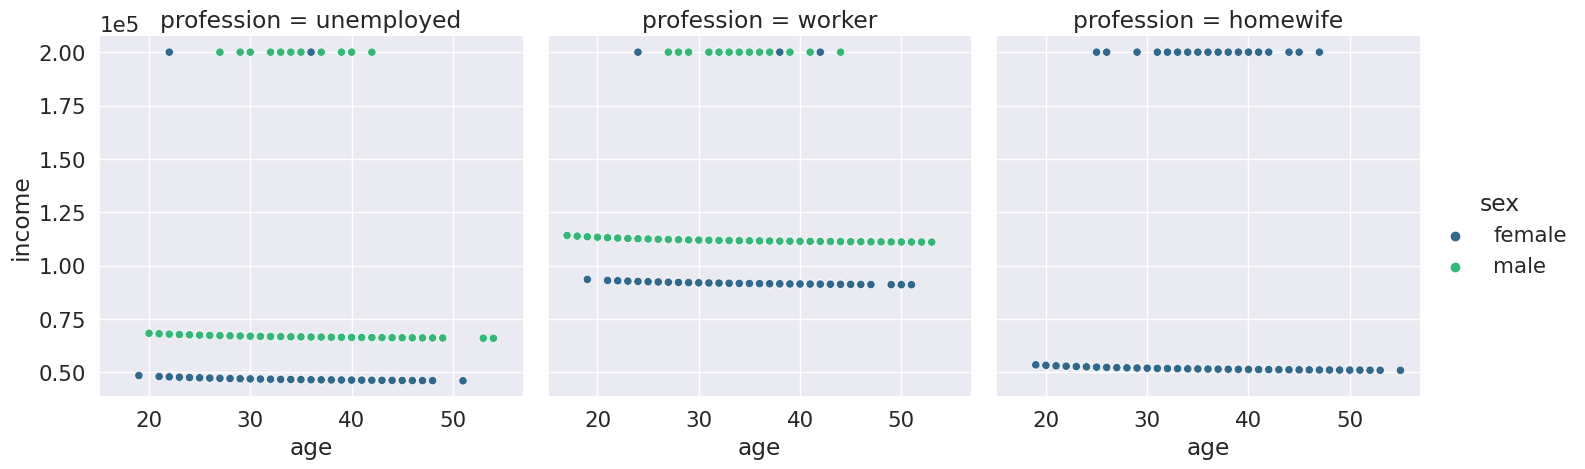

In [ ]:
#Распределение дохода по профессии
fig=plt.figure(figsize=(12,4))
g = sns.relplot(data=data, x="age", y="income", palette='viridis',
            col='profession', hue='sex')
for ax in g.axes.flatten():
    ax.ticklabel_format(style='sci', scilimits=(0,2), axis='both')
del fig, ax, g

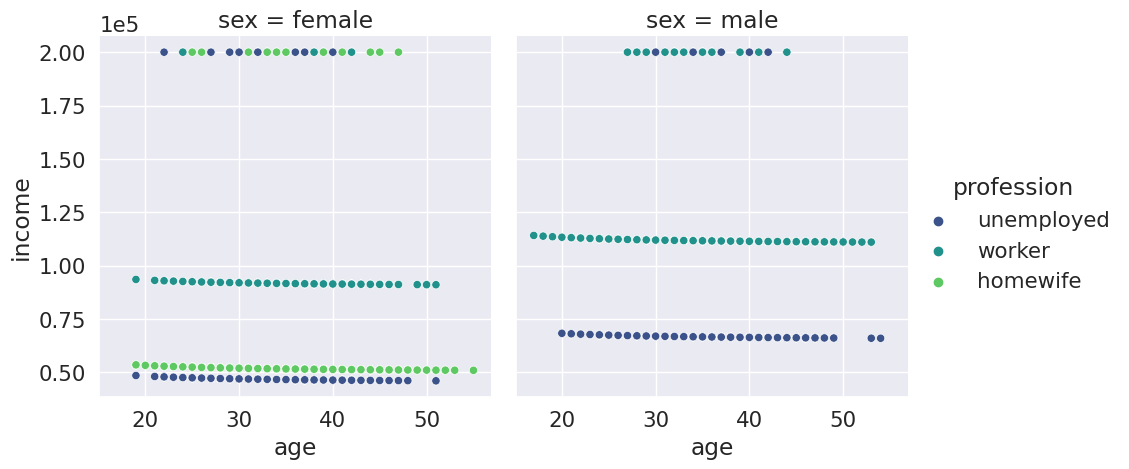

In [ ]:
#Распределение дохода по полу
g = sns.relplot(data, x="age", y="income", palette='viridis', hue="profession",
            col="sex")
for ax in g.axes.flatten():
    ax.ticklabel_format(style='sci', scilimits=(0,2), axis='both')
del ax, g

In [ ]:
#Для количественных переменных рассчитаем количество, среднее и прочую статистику
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe(percentiles=None, include=None, exclude=None)

,age,income
count,9518.00,10000.00
mean,34.94,77608.47
std,5.05,28850.42
min,17.00,46087.00
25%,32.00,51667.00
50%,35.00,66724.00
75%,38.00,111429.00
max,55.00,200000.00


# **Пункт 2 - Построить базовую модель машинного обучения**

**2.1 Устранить строки с пропущенными значениями**

In [ ]:
#Чистим NaN
print("\n", "Missing values were")
for col in data.columns:
    print(col, data[col].isna().sum())
data_cleared = data.dropna(inplace=False)
print("\n", "Missing values are deleted!")
del col


 Missing values were
age 482
sex 482
profession 0
income 0

 Missing values are deleted!


**!!! 2.2 Провести OneHot-кодирование номинальных признаков**


(используя метод sklearn.preprocessing.OneHotEncoder с опцией drop=’first’):

In [ ]:
#Делаем OneHotEncoding
# It's recommended to use pandas solution:
data_cleared = pd.get_dummies(data_cleared, columns=cat_cols, drop_first=True)
# But we'll use sklearn.preprocessing by ourself

# from sklearn.preprocessing import OneHotEncoder

# def one_hot_enc(data, cat_cols):
#   oh= OneHotEncoder(drop='first', sparse_output=False).set_output(
#     transform="pandas")
#   one_hot_encoded=oh.fit_transform(data[cat_cols])
#   data = pd.concat([data,one_hot_encoded],axis=1).drop(
#     columns=cat_cols)
#   return data;

# one_hot_enc(data_cleared, cat_cols);
data_cleared

,age,income,sex_male,profession_unemployed,profession_worker
0,31.00,46923.00,0,1,0
1,42.00,46351.00,0,1,0
3,26.00,92381.00,0,0,1
4,35.00,91667.00,0,0,1
5,26.00,47381.00,0,1,0
...,...,...,...,...,...
9995,41.00,111389.00,1,0,1
9996,39.00,111471.00,1,0,1
9997,34.00,111724.00,1,0,1
9998,33.00,111786.00,1,0,1


**2.3 Провести OneHot-кодирование меток класса (для задач классификации)**

In [ ]:
# Здесь имелось в виду повторить вышестоящий фрейм кода, но для target'a
# В нашем случае - не актуально

**2.4 Визуализировать корреляционную матрицу признаков, сделать выводы**

Text(0.5, 1.0, 'Heatmap of correlation matrix')

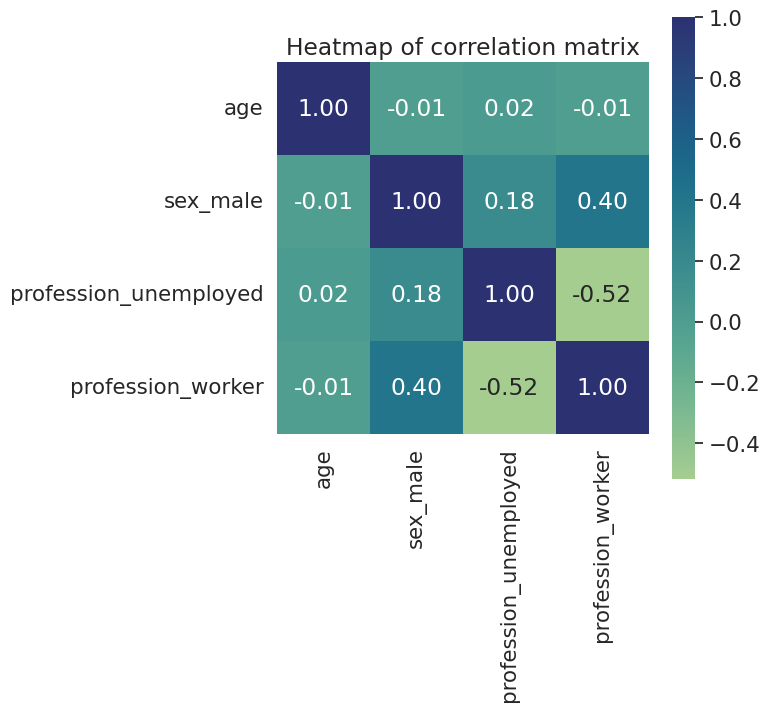

In [ ]:
#Визуализировать корреляционную матрицу признаков
plt.subplots(figsize=(6,6))
sns.heatmap(data_cleared.drop(target, axis=1).corr(), annot=True,
            cmap='crest', fmt=".2f", square=True);
plt.title('Heatmap of correlation matrix')

**2.5 Разбить исходную выборку на обучающую и тестовую**

 (70% первых строк включить в обучающую выборку, оставшиеся строки – в тестовую)

In [ ]:
#Разбить на тестовую и обучающую выборки
from sklearn.model_selection import train_test_split

#data_cleared[:int((len(data)*0.7))]
X = data_cleared.drop(target, axis=1)
y = data_cleared[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False,
                                                    test_size=0.3,
                                                    random_state=0)
print("Data is splitted 70% for train and 30% for test!")

Data is splitted 70% for train and 30% for test!


**2.6 Обучить простейшую линейную регрессионную модель со свободным членом методом наименьших квадратов**

In [ ]:
#Fit'им линейную регрессию
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression(fit_intercept=True)
lr1.fit(X_train, y_train)

LinearRegression()

**2.7 Рассчитать коэффициент детерминации обученной модели на обучающей и тестовой выборках**

In [ ]:
#Коэф-нт детерминации- это r2_score
#Среднеквадратичное отклонение - это RMSE
from sklearn.metrics import mean_squared_error, r2_score

print('Errors for Train, then Test datas:')
for X_feat, y_feat in [[X_train, y_train], [X_test, y_test]]:
  preds = lr1.predict(X_feat)
  X_feat['LR_error'] = y_feat - preds
  print('R2\t', r2_score(y_feat, preds))
  print('RMSE\t', np.sqrt(mean_squared_error(y_feat, preds)), '\n')
del X_feat, y_feat, preds

Errors for Train, then Test datas:
R2	 0.7689583563380847
RMSE	 12732.251553828499 

R2	 0.7654127468028749
RMSE	 11771.206886906804 



**2.8 Построить гистограммы распределения ошибок модели на обучающей и тестовой выборках**

In [ ]:
#Добавляем параметр split_key =0 для train данных, и =1 - для тестовой выборки
#Чтобы потом объединить в один датафрейм train и test ошибки предсказаний модели
X_train['split_key'] = np.zeros((len(X_train['age']), 1))
X_test['split_key'] = np.ones((len(X_test['age']), 1))
X = pd.concat([X_train, X_test])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-23-12cfc54a0fe1>:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


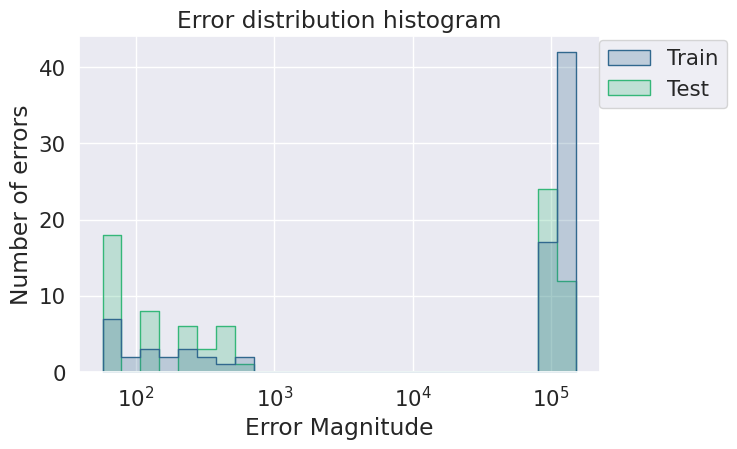

In [ ]:
#Строим гистограмму ошибок в log10-шкале
fig, ax = plt.subplots()
hist1 = sns.histplot(data=X, x='LR_error', bins=25, hue='split_key',
                     element="step", log_scale=True, palette='viridis')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
fig.legend(handles, ['Train', 'Test'], loc='outside lower center',
           bbox_to_anchor=(1.06, 0.72))
plt.xlabel('Error Magnitude')
plt.ylabel('Number of errors')
plt.title('Error distribution histogram')
fig.tight_layout()
plt.show()

In [ ]:
pd.DataFrame.duplicated(data_cleared);

# Данных в df = 9518
print(f'Duplicates in dataset: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')

Duplicates in dataset: 9660, (96.6%)


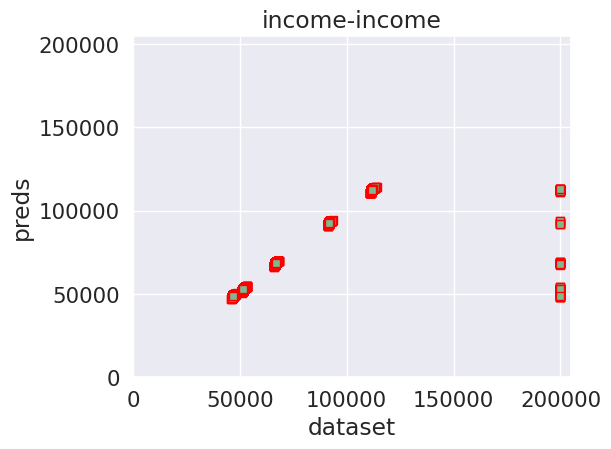

In [ ]:
fig, ax = plt.subplots()
#scatter1 = sns.scatterplot(data=pd.concat([X, y]), y='income', x='age')
plt.scatter(y['income'], y['income']-X['LR_error'], marker="s", edgecolors='red')
plt.xlim(xmin=0,xmax=205000)
plt.ylim(ymin=0,ymax=205000)
plt.xlabel('dataset')
plt.ylabel('preds')
plt.title('income-income')
fig.tight_layout()
plt.show()

#**Пункт 3 - Улучшить точность базовой модели**

In [ ]:
#Е:башим нормировОчку
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train[num_cols] = sc_X.fit_transform(X_train[num_cols])
X_test[num_cols] = sc_X.transform(X_test[num_cols])

sc_y = StandardScaler()
y_train[target] = sc_y.fit_transform(y_train[target])
y_test[target] = sc_y.transform(y_test[target])

In [ ]:
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Errors for Train, then Test datas:')
for X_feat, y_feat in [[X_train, y_train], [X_test, y_test]]:
  preds = lr2.predict(X_feat)
  X_feat['LR_error_norm'] = y_feat - preds
  print('R2\t', r2_score(y_feat, preds))
  print('RMSE\t', np.sqrt(mean_squared_error(y_feat, preds)), '\n')
X = pd.concat([X_train, X_test])
del X_feat, y_feat

Errors for Train, then Test datas:
R2	 1.0
RMSE	 1.390565674636923e-12 

R2	 1.0
RMSE	 1.3889931005248088e-12 



<ipython-input-29-ba6a43897353>:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


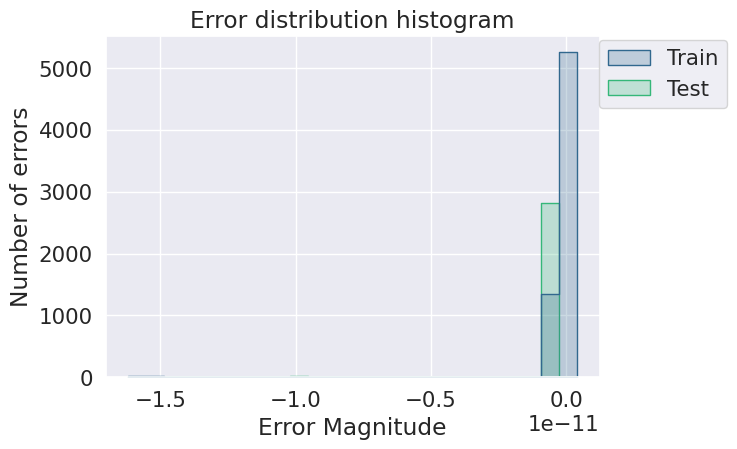

In [ ]:
#Строим гистограмму ошибок в log10-шкале
fig, ax = plt.subplots()
hist2 = sns.histplot(data=X, x='LR_error_norm', bins=25, hue='split_key',
                     element="step", palette='viridis', log_scale=False)
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
fig.legend(handles, ['Train', 'Test'], loc='outside lower center',
           bbox_to_anchor=(1.06, 0.72))
plt.xlabel('Error Magnitude')
plt.ylabel('Number of errors')
plt.title('Error distribution histogram')
fig.tight_layout()
plt.show()

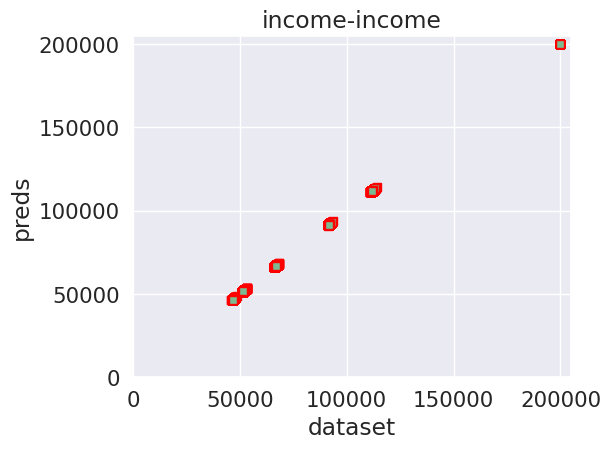

In [ ]:
fig, ax = plt.subplots()
#scatter1 = sns.scatterplot(data=pd.concat([X, y]), y='income', x='age')
plt.scatter(y['income'], y['income']-X['LR_error_norm'], marker="s", edgecolors='red')
plt.xlim(xmin=0,xmax=205000)
plt.ylim(ymin=0,ymax=205000)
plt.xlabel('dataset')
plt.ylabel('preds')
plt.title('income-income')
fig.tight_layout()
plt.show()

In [ ]:
#Bucket'ирование
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=10, encode='ordinal').fit(X_train['age'].to_numpy().reshape(-1, 1))
X_train['age'] = est.fit_transform(X_train['age'].to_numpy().reshape(-1, 1))
X_test['age'] = est.transform(X_test['age'].to_numpy().reshape(-1, 1))

In [ ]:
lr3 = LinearRegression(fit_intercept=True)
lr3.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Errors for Train, then Test datas:')
for X_feat, y_feat in [[X_train, y_train], [X_test, y_test]]:
  preds = lr3.predict(X_feat)
  X_feat['LR_error_buck'] = y_feat - preds
  print('R2\t', r2_score(y_feat, preds))
  print('RMSE\t', np.sqrt(mean_squared_error(y_feat, preds)), '\n')
X = pd.concat([X_train, X_test])
del X_feat, y_feat

Errors for Train, then Test datas:
R2	 0.9999711864665422
RMSE	 0.005367823903394132 

R2	 0.9999656613166794
RMSE	 0.005376510884137471 



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-34-8b91c94f2327>:6: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = legend.legendHandles


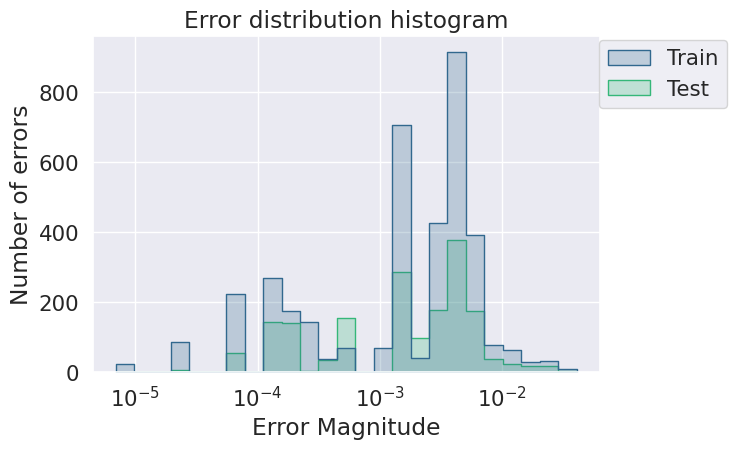

In [ ]:
#Строим гистограмму ошибок в log10-шкале
fig, ax = plt.subplots()
hist3 = sns.histplot(data=X, x='LR_error_buck', bins=25, hue='split_key',
                     element="step", log_scale=True, palette='viridis')
legend = ax.get_legend()
handles = legend.legendHandles
legend.remove()
fig.legend(handles, ['Train', 'Test'], loc='outside lower center',
           bbox_to_anchor=(1.06, 0.72))
plt.xlabel('Error Magnitude')
plt.ylabel('Number of errors')
plt.title('Error distribution histogram')
fig.tight_layout()
plt.show()

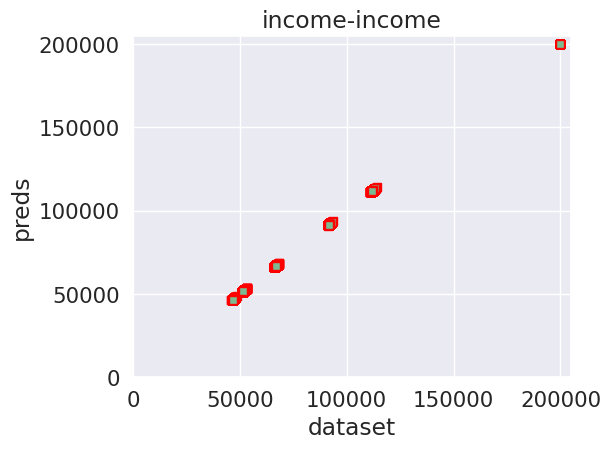

In [ ]:
fig, ax = plt.subplots()
#scatter1 = sns.scatterplot(data=pd.concat([X, y]), y='income', x='age')
plt.scatter(y['income'], y['income']-X['LR_error_buck'], marker="s", edgecolors='red')
plt.xlim(xmin=0,xmax=205000)
plt.ylim(ymin=0,ymax=205000)
plt.xlabel('dataset')
plt.ylabel('preds')
plt.title('income-income')
fig.tight_layout()
plt.show()